In [1]:
import sys
import os
sys.path.append('../src')

import pandas as pd
import matplotlib.pyplot as plt
from time_series_analysis import check_stationarity, load_data, grid_search_arima, fit_arima_model
print(os.getcwd())
# Load the data
data = load_data("../data/cleaned_stock_data.csv")


/Users/jinikho/Documents/GitHub/stock-market-analysis/notebooks


In [2]:
is_stationary = check_stationarity(data)
if not is_stationary:
    data = data.diff().dropna()
    print("Data after differencing: ")
    print(data.head())

Testing for stationarity...
ADF Statistic: 1.359624730046042
p-value: 0.9969227776622006
Data is not stationary. Consider differencing.
Data after differencing: 
Date
2020-01-03   -0.095598
2020-01-06    0.024647
2020-01-07    0.071450
2020-01-08    0.011202
2020-01-09    0.065727
Freq: B, Name: Adj Close, dtype: float64


In [3]:
p_range = range(0,4)
d_range = range(0,3)
q_range = range(0,4) 

best_order, best_model = grid_search_arima(data, p_range, d_range, q_range)
print(f"Best ARIMA Order {best_order}")



/Users/jinikho/Documents/GitHub/stock-market-analysis/venv/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Best ARIMA Order: (2, 1, 3) with AIC: 4878.115728461582
Best ARIMA Order (2, 1, 3)


In [5]:
result, forecast_index, forecast_values = fit_arima_model(data, best_order)
# Transforming forecast back to the original scale
last_actual_price = load_data("../data/cleaned_stock_data.csv").iloc[-1]
forecast_original_scale = forecast_values.cumsum() + last_actual_price

# Create forecast DataFrame
forecast_df = pd.DataFrame({
    'Date': forecast_index,
    'Forecast_Change': forecast_values,
    'Forecast_Original_Scale': forecast_original_scale
})
print(forecast_df)

                 Date  Forecast_Change  Forecast_Original_Scale
2024-12-11 2024-12-11         1.084579               136.154587
2024-12-12 2024-12-12        -0.618021               135.536566
2024-12-13 2024-12-13         0.935552               136.472118
2024-12-16 2024-12-16        -0.427323               136.044794
2024-12-17 2024-12-17         0.709774               136.754569
2024-12-18 2024-12-18        -0.173918               136.580651
2024-12-19 2024-12-19         0.436815               137.017466
2024-12-20 2024-12-20         0.110148               137.127615
2024-12-23 2024-12-23         0.150205               137.277820
2024-12-24 2024-12-24         0.390876               137.668696
2024-12-25 2024-12-25        -0.116593               137.552103
2024-12-26 2024-12-26         0.636302               138.188405
2024-12-27 2024-12-27        -0.334010               137.854395
2024-12-30 2024-12-30         0.820054               138.674449
2024-12-31 2024-12-31        -0.479563  

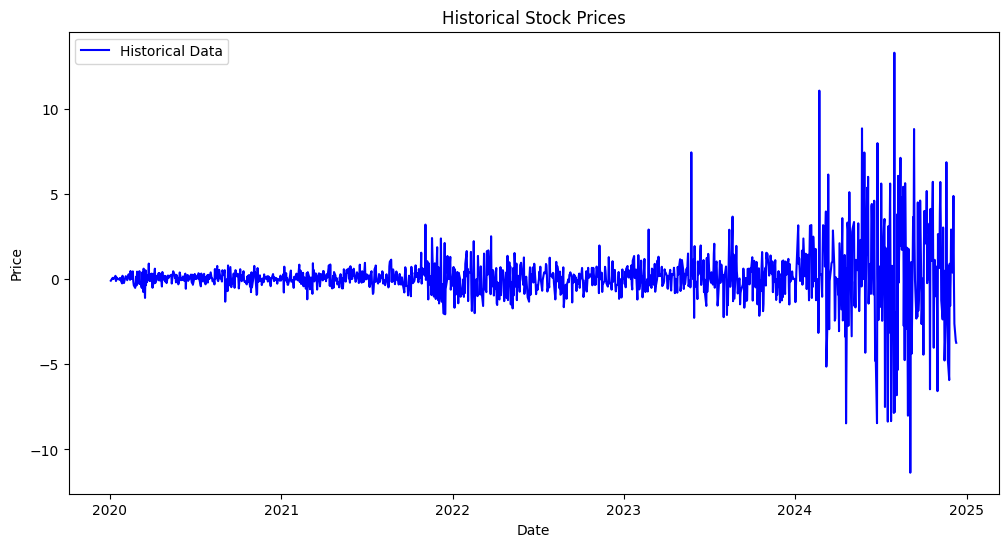

In [6]:
plt.figure(figsize=(12, 6))
plt.plot(data, label="Historical Data", color="blue")
plt.title("Historical Stock Prices")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.show()

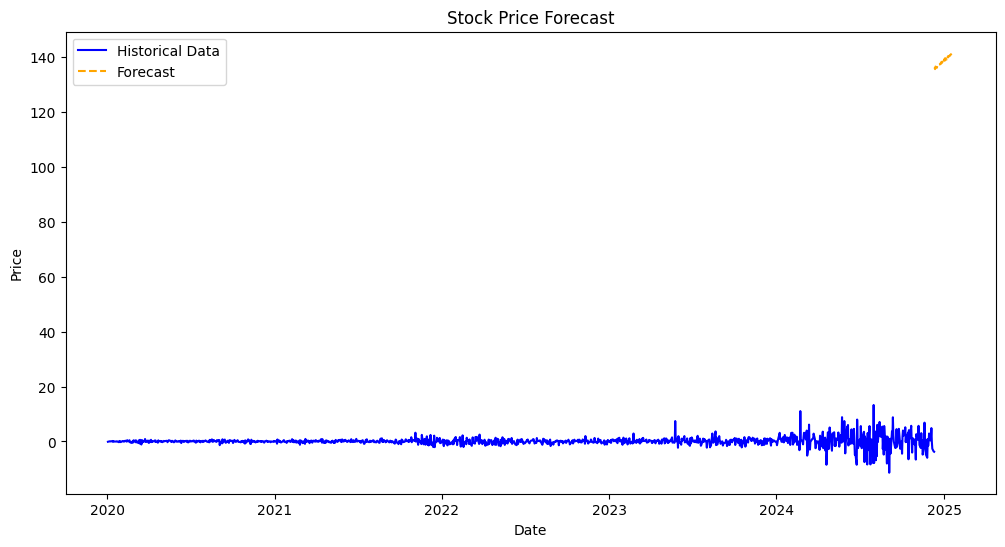

In [7]:
#Plotting historical vs forecasted data
plt.figure(figsize=(12, 6))
# Historical data
plt.plot(data, label="Historical Data", color="blue")

# Forecasted data
plt.plot(forecast_df['Date'], forecast_df['Forecast_Original_Scale'], label="Forecast", linestyle="--", color="orange")

# Add titles and labels
plt.title("Stock Price Forecast")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.show()

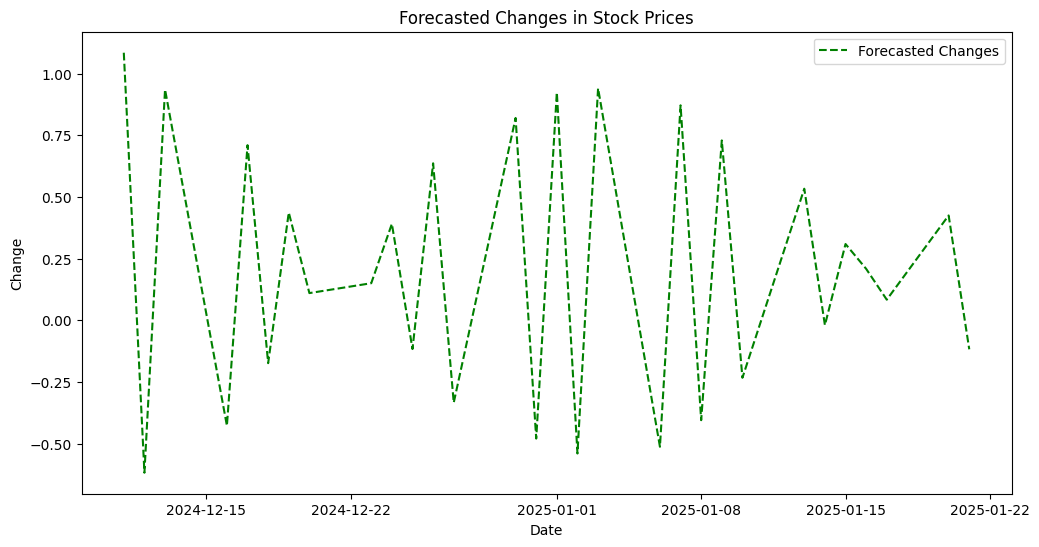

In [13]:
#Plotting forecasted changes
plt.figure(figsize=(12, 6))
plt.plot(forecast_df['Date'], forecast_df['Forecast_Change'], label="Forecasted Changes", linestyle="--", color="green")
plt.title("Forecasted Changes in Stock Prices")
plt.xlabel("Date")
plt.ylabel("Change")
plt.legend()
plt.show()

In [12]:
from IPython.display import display

display(forecast_df.head(10))

,Date,Forecast_Change,Forecast_Original_Scale
2024-12-11,2024-12-11,1.084579,136.154587
2024-12-12,2024-12-12,-0.618021,135.536566
2024-12-13,2024-12-13,0.935552,136.472118
2024-12-16,2024-12-16,-0.427323,136.044794
2024-12-17,2024-12-17,0.709774,136.754569
2024-12-18,2024-12-18,-0.173918,136.580651
2024-12-19,2024-12-19,0.436815,137.017466
2024-12-20,2024-12-20,0.110148,137.127615
2024-12-23,2024-12-23,0.150205,137.277820
2024-12-24,2024-12-24,0.390876,137.668696
